# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [151]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [152]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [153]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [154]:
# Create a Beautiful Soup Object
page = requests.get(url)
soup = soup(page.content, 'html.parser')

In [155]:
# Extract all rows of data
table = soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [156]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in table:
    row_data_list = []
    for cell in row.find_all('td'):
        row_data_list.append(cell.text)
    row_data = {'id':row_data_list[0], 'terrestrial_date':row_data_list[1], 'sol': row_data_list[2], \
        'ls':row_data_list[3], 'month':row_data_list[4], 'min_temp':row_data_list[5], 'pressure': row_data_list[6]}
    data_list.append(row_data)


In [157]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data_list)

In [158]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [159]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [160]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(int)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [161]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [166]:
# 1. How many months are there on Mars?
distinct_months = mars_df['month'].nunique()
print('There are ', distinct_months, ' months on Mars')

There are  12  months on Mars


In [168]:
# 2. How many Martian days' worth of data are there?
distinct_days = mars_df['sol'].nunique()
print('There are ', distinct_days, ' Martian days worth of data in the dataset')

There are  1867  Martian days worth of data in the dataset


In [169]:
# 3. What is the average low temperature by month?
avg_low_df = mars_df.groupby('month')['min_temp'].mean()
avg_low_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

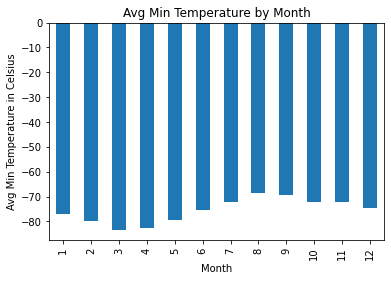

In [ ]:
# Plot the average temperature by month
avg_low_df.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Avg Min Temperature in Celsius')
plt.title('Avg Min Temperature by Month')

# Display the plot
plt.show()

In [ ]:
# Identify the coldest and hottest months in Curiosity's location

avg_low_df=avg_low_df.reset_index()
# Find min temp month
lowest_temp_month = avg_low_df['month'].loc[avg_low_df['min_temp'].idxmin()]
print("Month with the lowest average minimum temperature:", lowest_temp_month)

# Find max temp month
max_temp_month = avg_low_df['month'].loc[avg_low_df['min_temp'].idxmax()]
print("Month with the lowest average minimum temperature:", max_temp_month)



Month with the lowest average minimum temperature: 3
Month with the lowest average minimum temperature: 8


In [ ]:
# Put the dataframe in the right shape to plot
avg_low_df_sorted = avg_low_df_sorted.reset_index(drop = True)

In [ ]:
avg_low_df_sorted = avg_low_df_sorted.drop('index', axis = 1)

In [ ]:
avg_low_df_sorted.head()

,month,min_temp
0,8,-68.382979
1,9,-69.171642
2,10,-71.982143
3,11,-71.985507
4,7,-72.281690


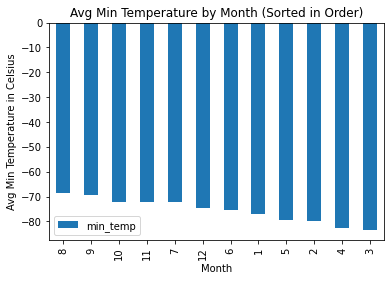

In [ ]:
# Sort my data
avg_low_df_sorted.plot(x = 'month', y ='min_temp',kind='bar')

# Plot it same way as above
# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Avg Min Temperature in Celsius')
plt.title('Avg Min Temperature by Month (Sorted in Order)')

# Display the plot
plt.show()

In [ ]:
# 4. Average pressure by Martian month
avg_pressure_df = mars_df.groupby('month')['pressure'].mean()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

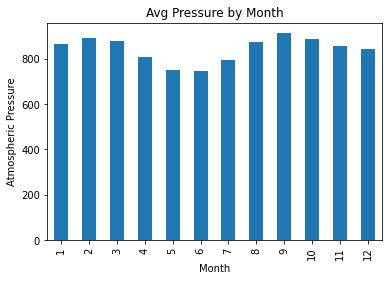

In [ ]:
# Plot the average pressure by month
avg_pressure_df.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Avg Pressure by Month')

# Display the plot
plt.show()

In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Filter my dataframe to just rows where the month = 1 and the previous row has month = 12
# Because my data are sorted by date, this will get me the first terrestrial data that represents the start of a new Martian year
# This way I can tell that the distance between two rows is one Martian year, and the difference in Earth days tells us how long a Martian year is
filtered_dates = mars_df[(mars_df['month'] == 1) & (mars_df['month'].shift(1) == 12)]['terrestrial_date']

# Print the result
print("Terrestrial dates on the first day of a Martian year:")
print(filtered_dates)

Terrestrial dates on the first day of a Martian year:
304    2013-08-01
925    2015-06-19
1579   2017-05-06
Name: terrestrial_date, dtype: datetime64[ns]


In [ ]:
# Now I can take the difference and see how long a Martian year is
year_one = filtered_dates.iloc[1]-filtered_dates.iloc[0]
year_two = filtered_dates.iloc[2]-filtered_dates.iloc[1]
year_mean = (year_one+year_two)/2
print(year_mean)

687 days 00:00:00


We see there are 687 Earth days in a Martian year.

In [ ]:
# 5. How many terrestrial (earth) days are there in a Martian year?


Doing the exercise below - the chart in the sample code doesn't seem to line up with the question about finding the # of days in a Martian year, but I can recreate it anyways for the visual observation.

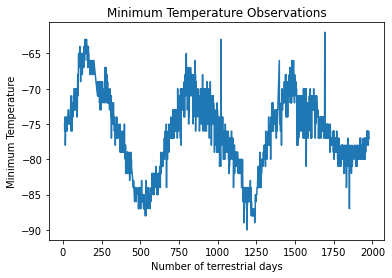

In [ ]:
plt.plot(mars_df['sol'], mars_df['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Observations')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV
mars_df.to_csv('mars_weather_data_scraped', encoding = 'utf8', index = False)

In [ ]:
browser.quit()